In [1]:
#Step 1:- Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
#Step 2 :- Load data
from sklearn.model_selection import train_test_split
(x_train , y_train) ,(x_test , y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz',
    test_split=0.2,
    seed=42   #seed=42: Your training and testing data will always be split the same way.
)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [3]:
#Step 3 :- Check data shape and type
(x_train.shape ,type(x_train)),(x_test.shape ,type(x_test)) , (y_train.shape ,type(y_train)), (y_test.shape ,type(x_test))

(((404, 13), numpy.ndarray),
 ((102, 13), numpy.ndarray),
 ((404,), numpy.ndarray),
 ((102,), numpy.ndarray))

In [4]:
#step 4 :-Converting Data to DataFrame
x_train_df = pd.DataFrame(x_train)
y_train_df = pd.DataFrame(y_train)
x_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [5]:
x_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
#step 5 :- Preprocessing (Normalization and data-type change)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

ct = make_column_transformer(
    (MinMaxScaler(), [0,1,2,3,4,5,6,7,8,9,10,11])
)

x_train = ct.fit_transform(x_train).astype('float32')
x_test = ct.fit_transform(x_test).astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.042528,0.115681,0.394210,0.069307,0.348815,0.521905,0.681970,0.241618,0.376560,0.423589,0.625737,0.897607
std,0.102650,0.242696,0.253866,0.254290,0.239522,0.138678,0.288719,0.194973,0.379829,0.323827,0.229502,0.232131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.000000,0.137860,0.444098,0.438466,0.087361,0.130435,0.179389,0.510638,0.944992
50%,0.002881,0.000000,0.338343,0.000000,0.314815,0.507569,0.768280,0.184767,0.173913,0.272901,0.691489,0.985892
75%,0.041717,0.125000,0.646628,0.000000,0.491770,0.586223,0.942585,0.362255,1.000000,0.914122,0.808511,0.997252
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# step 6 :- Reserve data for validation
x_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
x_train.shape, X_val.shape, y_train.shape, y_val.shape

((363, 12), (41, 12), (363,), (41,))

In [20]:
#step 7 :- Creating the Model
from tensorflow.keras.optimizers import Adam
# Building the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=10, activation='relu', input_shape=(x_train.shape[1],), name='Dense_1'),
  tf.keras.layers.Dense(units=100, activation='relu', name='Dense_2'),
  tf.keras.layers.Dense(units=1, name='Prediction')
])

# Compiling the model
model.compile(
    loss ='mse',
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
    #optimizer = Adam(learning_rate=0.0001),
    metrics = ['mse']
)

# Training the model
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val)
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 381.2009 - mse: 381.2009 - val_loss: 132.2033 - val_mse: 132.2033
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 88.5573 - mse: 88.5573 - val_loss: 105.7048 - val_mse: 105.7048
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 71.9539 - mse: 71.9539 - val_loss: 81.2672 - val_mse: 81.2672
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 52.0251 - mse: 52.0251 - val_loss: 86.9409 - val_mse: 86.9409
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 51.2358 - mse: 51.2358 - val_loss: 77.1880 - val_mse: 77.1880
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 48.2102 - mse: 48.2102 - val_loss: 64.0148 - val_mse: 64.0148
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 48.2163 - mse: 48.2163 - val_loss: 88.0514 - val_mse: 88.0514
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 41.4828 - mse: 41.4828 - val_loss: 68.2479 - val_mse: 68.2479
Epoch 9/50
12/12 ━━━━━━━━━━

Text(0.5, 1.0, 'Mean Sqaured Error')

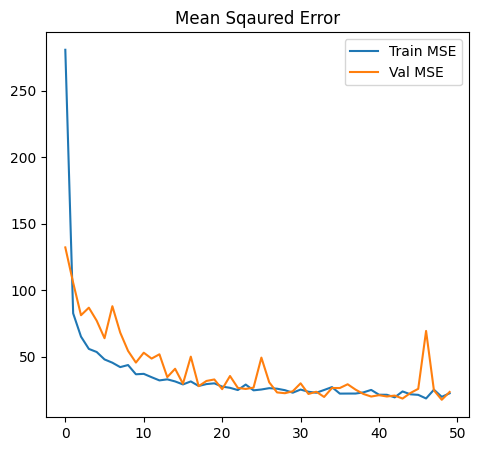

In [22]:
# Step 8: Plot MAE and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Val MSE')
plt.legend()
plt.title('Mean Sqaured Error')


In [23]:
#step 9 :- Model Prediction
y_pred = model.predict(x_test)
y_pred[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([15.557941], dtype=float32)